# Model-based learning 

A way to generalize from a set of examples is to build a model of these examples and then use that model to make predictons.

### Does the money make people happy?

For example, suppose you want to know if money makes people happy, so you download the Better Life Index data from OECD's website and stats about gross domestic product per capta from IMF's website.

First, we import the libraries we are gonna use.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model #since we choose linear regression as better fit model

In [2]:
#Load the data

oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("WEO_Data.csv", thousands=',', encoding='latin1', na_values='n/a')

The following function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

### Preparing the datasets

#### We load and prepare the Life Satisfaction data

If you want, you can get fresh data from the OECD's website. Download the CSV from http://stats.oecd.org/index.aspx?DataSetCode=BLI and save it to datasets/lifesat/.

In [4]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0


In [5]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      7.1
Belgium      6.9
Brazil       6.4
Canada       7.4
Name: Life satisfaction, dtype: float64

#### We load and prepare the GDP per capita data

Just like above, you can update the GDP per capita data if you want. Just download data from http://goo.gl/j1MSKe (=> imf.org) and save it to datasets/lifesat/.

In [6]:
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.380,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.140,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.320,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.300,2011.0


Now, we join the two tables ad sort by GDP per capita. The following table shows an excerpt of the data.

In [7]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats.head()

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,22.0,37.0,73.0,18.12,43.0,36.1,13.7,NaN,NaN,18.0,...,14.92,73.0,67.0,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5694.57,2014.0
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,NaN,53.0,75.0,14.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6083.51,2014.0
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,79.0,73.0,16.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8670.00,2014.0
Mexico,16.0,25.5,38.0,28.70,61.0,41.8,18.1,NaN,NaN,20.0,...,NaN,63.0,68.0,15.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.28,2015.0
Russia,15.0,14.8,94.0,0.14,70.0,52.8,9.6,NaN,NaN,18.0,...,NaN,68.0,55.0,16.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.91,2015.0


Thus, we can check both the GDP per capita and the Life Satisfaction index in our dataset. For example, the followings are the indicators for U.S.

In [8]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

GDP per capita       55805.2
Life satisfaction        6.9
Name: United States, dtype: float64

In [9]:
remove_indices = [0]
keep_indices = list(set(range(40)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

Now, let's plot the data for some of these countries.

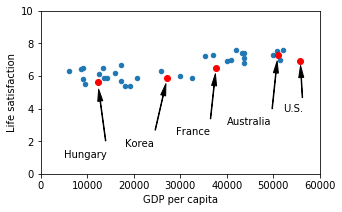

In [10]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.show()

In [11]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.89,5.6
Korea,27195.20,5.9
France,37675.01,6.5
Australia,50961.87,7.3
United States,55805.20,6.9


There does seem to be a trend in the chart! It looks like life satisfaction goes up more or less nearly as the country's GDP per capita increases. So we decide that to model life satistafction as a linear function of GDP per capita. This step is called _model selection_: we select a _linear model_ of life satsfaction with just one attribute, GDP per capita.
The equation looks like the following:

life_satisfaction = $\theta _0$ + $\theta _1$ x GDP_per_capita

This model has two _model parameters_, $\theta _0$ and $\theta _1$. By tweaking these parameters, we can make the model represent any linear function, as it is shown below.

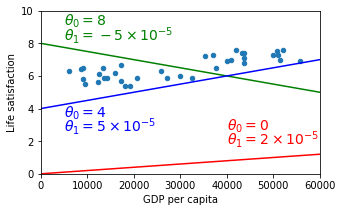

In [12]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

Before we can use the model, we need to define the parameter values $\theta _0$ and $\theta _1$.
<br>For linear regression problems, people typcally use a cost function that measures the distance between the linear model's predictions and the training examples; the objetive s to minimize this distance.

In [13]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(5.8142401260399295, 2.2892721887624473e-05)

We feed our training examples, and it finds the parameters that make the linear model fit best to the data.
<br>This is called _trainning_ the model.
<br>Thus, the model fits the training data as closely as possible for a linear model, as the following.

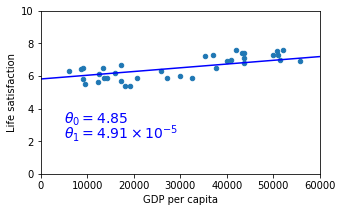

In [14]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

Now we are finally ready to run the model to make predictions.
For example, we want to know how happy Cypriots are, and the OECD data does not have the answer.
Thus, we look up Cyprus's GDP per capita, $22,587, and then apply our model.

In [15]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_life_satisfaction

22587.49


6.331329252749429

Let's plot the result for Cyprus Life Satisfaction.

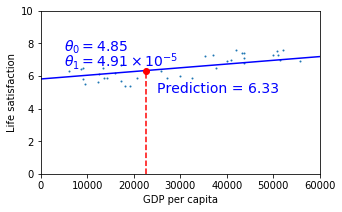

In [16]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=1)
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 6.33", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
plt.show()

### Nonrepresentative training data

It is crucial that our training data be representative of the new cases we want to generalize to.
<br>For example, the set of countres we used above for training the linear model was not perfectly representative; a few countries were missing.

In [17]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [18]:
oecd_bli, gdp_per_capita = backup

In [19]:
missing_data

,GDP per capita,Life satisfaction
Country,,
South Africa,5694.57,4.7


In [20]:
position_text2 = {
    "South Africa": (1000, 9.0),
#    "Mexico": (11000, 9.0),
#    "Chile": (25000, 9.0),
#    "Czech Republic": (35000, 9.0),
#    "Norway": (60000, 3),
#    "Switzerland": (72000, 3.0),
#    "Luxembourg": (90000, 3.0),
}

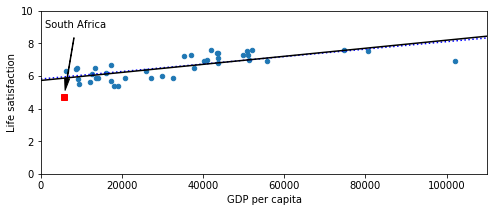

In [21]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")

plt.show()

In [22]:
full_country_stats.loc[[c for c in full_country_stats.index if "W" in c.upper()]]["Life satisfaction"]

Country
New Zealand    7.3
Sweden         7.3
Norway         7.6
Switzerland    7.5
Name: Life satisfaction, dtype: float64

### Overfitting the training

Overgeneralizing is something that we humans do all too often. In ML this is called _overfitting_. It means that the model performs well o the training data, but it does not generalize well.
<br>The following is an example of a high-degree polynomial life satisfaction model that strongly overfits the training data. Even though it performs better on training data than the linear model, would you really trust its predctions? 

C:\Users\tomas.ezequiel.rau\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1508: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
C:\Users\tomas.ezequiel.rau\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


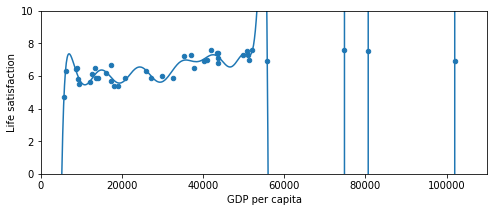

In [23]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.show()

##### Regularization

Constraining a model to make it simplier and reduce the risk of overfitting is called _regularization_.
<br>For example, the linear model we defined above has two parameters, $\theta _0$ and $\theta _1$. this gives the learning algorithm two _degrees of freedom_ to adapt the model to the training data: it can tweak both the height ($\theta _0$) and the slope ($\theta _1$) of the line. If we forced $\theta _0$=$\theta _1$, the algorithm would dhave only one degree of freedom and would have a mush harder time fitting the data properly: all it could do is move the line up or down to get as close as posible to traning instances, so it would end up around the mean. If we allow the algorithm to modify $\theta _1$ but we forceit to keep it small, then the learning algorithm will effectively have somewhere in between one or two degrees of freedom.
<br>We want to find the right balance between fitting the training data perfectly and keeping the model simple enough to ensure that it will generalize well.

<br>The following example shows three models. The dotted line represents the original model that was trained on the countries represented as circles; the dashed line is our second model trained with all countries; and the solid line trained with the same data as the first model but with a regularization constraint.
<br>The regularization forced the model to have smaller slope: this model does not fit the training data as well as the first model, but it actually generalizes better to new examples that t did not see during the training.

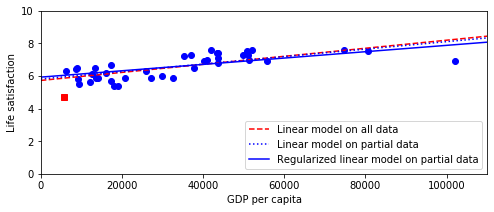

In [24]:
t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)

plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.show()

## _k_-Nearest Neighbors

In _k_-Nearest Neighbors model, K is the number of nearest neighbors. The number of neighbors is the core deciding factor.  First, you find the k closest point to the new case and then classify points by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction. For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance.
<br>That said, we proceed to replace the linear regression model with _k_-Nearest Neighbors regression in the first prediction for Cyprus.

<br>First, we load the data again and merge the tables as above.

In [25]:
#Load the data

oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("WEO_Data.csv", thousands=',', encoding='latin1', na_values='n/a')

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [26]:
# Prepare the data

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

Let's plot the data for the countries.

<function matplotlib.pyplot.show(*args, **kw)>

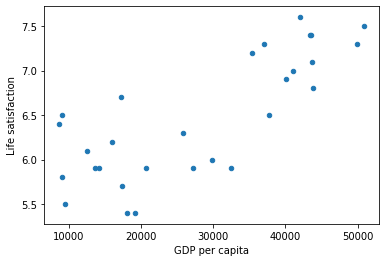

In [27]:
# Visualize the data

country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show

In order to compare the results, firstly we make the prediction with the linear model regression.

In [28]:
# Select a linear model

model = sklearn.linear_model.LinearRegression()

In [29]:
# Train the model

model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# Predict life satisfaction for Cyprus

X_new = [[22587.49]]  #Cyprus GDP per capita
print(model.predict(X_new))

[[6.25986316]]


So, our linear model regression predicted a life satisfaction index for Cypres of __6.25__.

#### _k_-Nearest Neighbors regression

Now, we are replacing the linear model regression with the _k_-nearest neighbors model regression.

In [31]:
import sklearn.neighbors

In [32]:
# Select a linear model

kneighbors_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [33]:
# Train the model

kneighbors_model.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [34]:
# Predict life satisfaction for Cyprus

X_new = [[22587.49]]  #Cyprus GDP per capita
print(kneighbors_model.predict(X_new))

[[5.86666667]]


Our _k_-nearest neighbors model predicted a life satisfaction index for Cypres of __5.86__. Thus, the _k_-nearest neighbors model made a better prediction than the linear model.